# 🎵 **Amazon Music Clustering Project**

# *Problem Understanding*
### The objective of this project is to automatically group Amazon Music songs based on their audio characteristics without using any predefined labels.
### Since no target variable is available, this is an unsupervised learning problem.

### *Import Necessary Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

### 📂 *Load the dataset*

In [2]:
df = pd.read_csv("C:/Users/VICKY/Desktop/Guvi/projects/Project 4/single_genre_artists.csv")
df.head()


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


### *Explore the dataset*

In [3]:
df.shape

(95837, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

#  **1 . Preprocessing**

# Check the object columms to store in variable
I will remove `track_name` (mapped to `name_song`), `artist_name` (mapped to `name_artists`), and `track_id` (mapped to `id_songs`) as they are identifiers and not suitable for clustering. 
We will also keep only the numerical audio features for the clustering process.

# Drop the object columns

In [5]:
object_cols = df.select_dtypes(include="object").columns
object_cols



Index(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'],
      dtype='object')

In [6]:
df[object_cols].head()


,id_songs,name_song,id_artists,release_date,genres,name_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,4AxgXfD7ISvJSTObqm4aIE,1922,['vintage chanson'],Mistinguett
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,4AxgXfD7ISvJSTObqm4aIE,1922,['vintage chanson'],Mistinguett
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,4AxgXfD7ISvJSTObqm4aIE,1922,['vintage chanson'],Mistinguett
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,4AxgXfD7ISvJSTObqm4aIE,1924,['vintage chanson'],Mistinguett
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,4AxgXfD7ISvJSTObqm4aIE,1924,['vintage chanson'],Mistinguett


In [7]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [8]:
df_clean = df.drop(columns=object_cols, axis=1)


In [9]:
df_clean 

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,0,161427,0,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,22
1,0,223440,0,0.427,0.1800,10,-15.375,1,0.0670,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,22
2,0,208267,0,0.511,0.2060,0,-15.514,1,0.0592,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,22
3,0,161933,0,0.676,0.4670,9,-12.393,0,0.1650,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,22
4,0,167973,0,0.650,0.2980,9,-13.806,1,0.1380,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,0.674,0.5680,1,-6.356,1,0.0408,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,56
95833,50,265846,0,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,36
95834,67,82500,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,52
95835,66,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,55


#   **Feature Selection**

**Select Recommended Audio Features:**
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms


In [10]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

X = df_clean[features]


#   **Normalization**
Since clustering is distance-based, we use `StandardScaler` to bring all features to the same scale.

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#  **2 . Clustering Techniques**

## 🔸 Option A : K-Means Clustering

### Step 1 : Elbow Method (Finding K)
I plot the 'Inertia' (Sum of Squared Errors). We look for the **elbow point** where adding more clusters doesn't provide significant improvement.

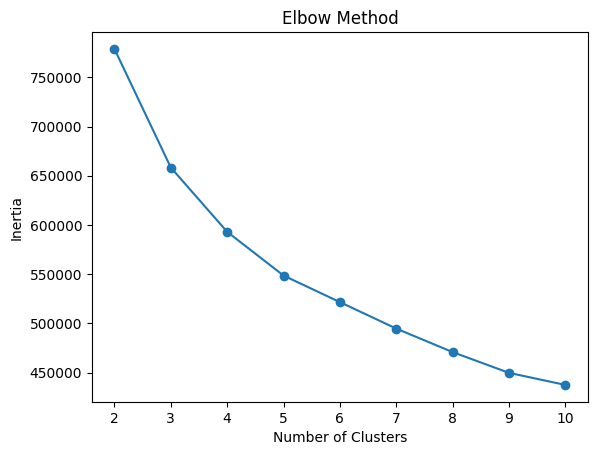

In [12]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


### **Step 2 : Silhouette Score**

In [13]:

# Take a random sample (e.g., 10,000 rows)
sample_idx = np.random.choice(len(X_scaled), size=10000, replace=False)
X_sample = X_scaled[sample_idx]

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.2019
k = 3, Silhouette Score = 0.2403
k = 4, Silhouette Score = 0.1736
k = 5, Silhouette Score = 0.1829
k = 6, Silhouette Score = 0.1561
k = 7, Silhouette Score = 0.1575


#  **Dimensionality Reduction**

**Goal:**  Reduce the dataset to 2 or 3 components to visualize clusters later.

In [14]:
final_kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = final_kmeans.fit_predict(X_scaled)

###  Applying PCA (Principal Component Analysis)

In [15]:


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

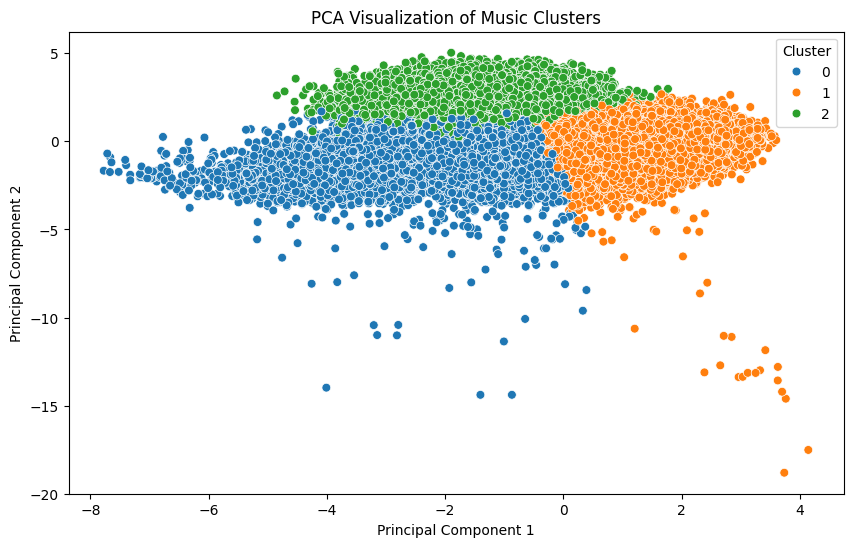

In [16]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="cluster",
    data=df,
    palette="tab10",
    s=40
)

plt.title("PCA Visualization of Music Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

#  **Evaluation**

In [17]:
# If you used kmeans_final above, inertia available
print("Silhouette Score:", round(silhouette_score(X_scaled, df['cluster'], sample_size=1000, random_state=42), 4))
print("Inertia:", round(final_kmeans.inertia_, 2))


Silhouette Score: 0.2467
Inertia: 658335.96


### “Silhouette score evaluates cluster separation quality, while inertia measures cluster compactness; good clustering has high silhouette score and low inertia.”

# **Cluster size check**

### 👉 Cluster size check shows the number of data points in each cluster, helping verify whether the clusters are balanced or dominated by one group.

In [18]:
df['cluster'].value_counts()

cluster
1    52560
0    30762
2    12515
Name: count, dtype: int64

In [19]:
features = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness",
    "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

cluster_profile = df.groupby("cluster")[features].mean()
cluster_profile

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.486242,0.311018,-13.208988,0.060103,0.749539,0.168760,0.182065,0.413047,111.933323,223500.904818
1,0.627309,0.693465,-7.608616,0.075061,0.258713,0.050681,0.199854,0.666324,124.905464,226568.204680
2,0.664254,0.466617,-13.364383,0.829908,0.585922,0.001384,0.435498,0.584036,100.387090,97522.338234


# **Cluster profile (mean features per cluster)**

In [20]:
cluster_profile.round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.49,0.31,-13.21,0.06,0.75,0.17,0.18,0.41,111.93,223500.90
1,0.63,0.69,-7.61,0.08,0.26,0.05,0.20,0.67,124.91,226568.20
2,0.66,0.47,-13.36,0.83,0.59,0.00,0.44,0.58,100.39,97522.34


In [21]:


# Use the cluster profile you already created
cluster_profile = df.groupby("cluster")[features].mean()

# Scale cluster profile for fair comparison
scaler = StandardScaler()
cluster_profile_scaled = scaler.fit_transform(cluster_profile)

# Convert back to DataFrame
cluster_profile_scaled = pd.DataFrame(
    cluster_profile_scaled,
    index=cluster_profile.index,
    columns=cluster_profile.columns
)

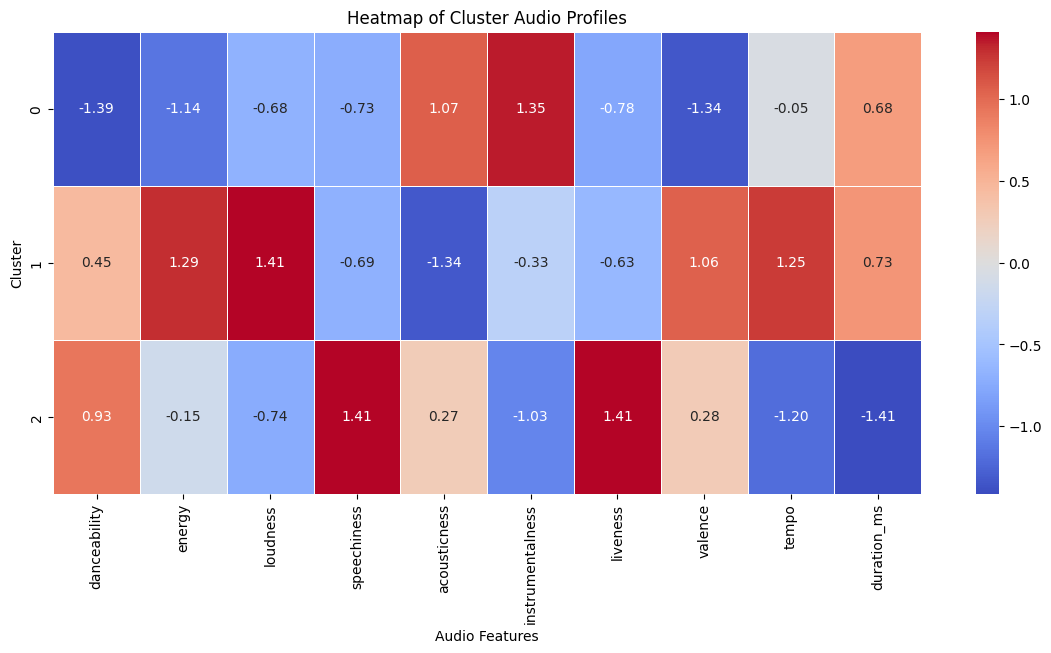

In [22]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    cluster_profile_scaled,
    
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Heatmap of Cluster Audio Profiles")
plt.xlabel("Audio Features")
plt.ylabel("Cluster")
plt.show()

# **Easy interpretation  (Top 3 high features each cluster)**

In [23]:
for c in cluster_profile.index:
    print(f"\nCluster {c} (Top features):")
    print(cluster_profile.loc[c].sort_values(ascending=False).head(3))


Cluster 0 (Top features):
duration_ms     223500.904818
tempo              111.933323
acousticness         0.749539
Name: 0, dtype: float64

Cluster 1 (Top features):
duration_ms    226568.204680
tempo             124.905464
energy              0.693465
Name: 1, dtype: float64

Cluster 2 (Top features):
duration_ms    97522.338234
tempo            100.387090
speechiness        0.829908
Name: 2, dtype: float64


# 🔸 Option B: DBSCAN (Tuning & Visualization)

## Good for detecting noise/outliers.

### Apply DBSCAN (tune eps & min_samples)

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.8, min_samples=12)
labels = dbscan.fit_predict(X_scaled)

In [25]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([  716, 95069,    52]))

In [26]:
noise_ratio = list(labels).count(-1) / len(labels) * 100
noise_ratio

0.7471018500161732

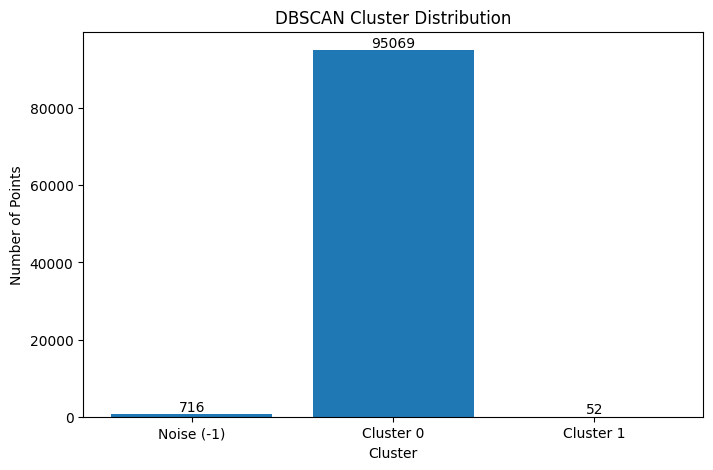

In [27]:


# Get unique cluster labels and counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Convert labels to string for better display
label_names = []
for label in unique_labels:
    if label == -1:
        label_names.append("Noise (-1)")
    else:
        label_names.append(f"Cluster {label}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(label_names, counts)

# Labels and title
plt.title("DBSCAN Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")

# Show values on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# 🔸 Option C: Option C: Hierarchical Clustering (linkage, dendrogram)

In [28]:
#  Create Linkage Matrix using a sample
from scipy.cluster.hierarchy import linkage, dendrogram 

X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]
linked = linkage(X_sample_hier, method='ward')

print("✅ Linkage matrix created successfully!")

✅ Linkage matrix created successfully!


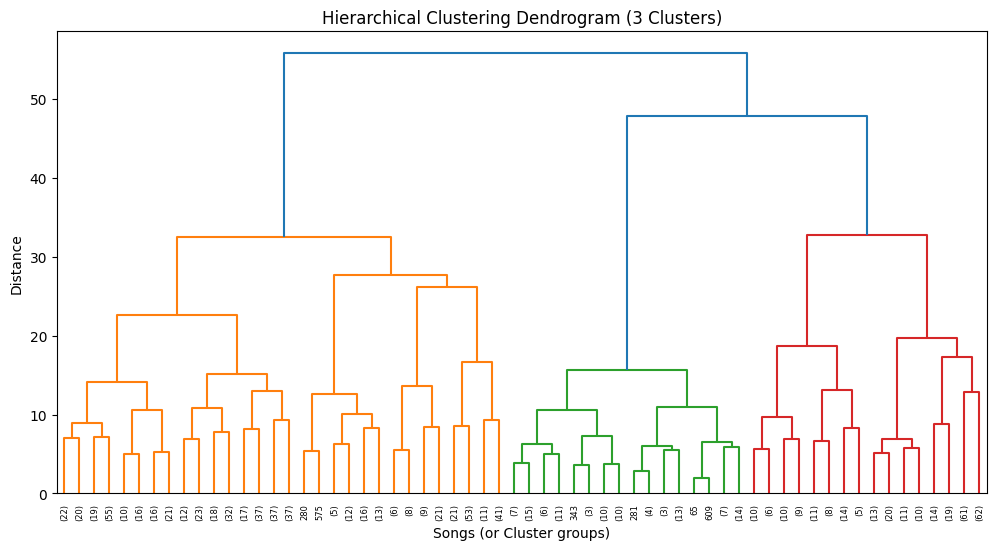

In [29]:
# 1. First, create the 'linked' matrix (NameError fix)
X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]
linked = linkage(X_sample_hier, method='ward')

# 2. Plot Dendrogram exactly as you asked
plt.figure(figsize=(12, 6))

# 'color_threshold' calculation to force exactly 3 clusters
dendrogram(
    linked, 
    truncate_mode='level', 
    p=5, 
    color_threshold=linked[-2, 2] # This logic makes 3 clear colors
)

plt.title("Hierarchical Clustering Dendrogram (3 Clusters)")
plt.xlabel("Songs (or Cluster groups)")
plt.ylabel("Distance")
plt.show()

#  **Final Clustering Algorithm Comparison**

In [30]:
# 1. Set seed and sample for performance (Silhouette Score is slow on large data)
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=min(10000, len(X_scaled)), replace=False)
X_metrics = X_scaled[sample_indices]

results = []

# 1. KMeans Metrics

In [31]:
# (Assumes KMeans was already run and labels are in df['cluster'])
from sklearn.metrics import davies_bouldin_score

kmeans_labels = df["cluster"].values[sample_indices]
results.append({
    "Algorithm": "KMeans",
    "Silhouette Score": silhouette_score(X_metrics, kmeans_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, kmeans_labels),
    "No. of Clusters": len(np.unique(df["cluster"])),
    "Noise %": 0.0
})

#   2 . DBSCAN 

In [32]:

# (Assumes DBSCAN was already run and labels are in 'labels' variable)
dbscan_labels_full = labels 
db_sample_labels = dbscan_labels_full[sample_indices]

# Mask to remove noise (-1) for scoring
core_mask = db_sample_labels != -1
unique_clusters_in_sample = np.unique(db_sample_labels[core_mask])
num_clusters_found = len(unique_clusters_in_sample)


if len(np.unique(db_sample_labels[core_mask])) > 1:
    results.append({
        "Algorithm": "DBSCAN",
        "Silhouette Score": silhouette_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "Davies-Bouldin Index": davies_bouldin_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "No. of Clusters": num_clusters_found,
        "Noise %": (np.sum(dbscan_labels_full == -1) / len(dbscan_labels_full)) * 100
    })
    print(f"✅ DBSCAN evaluated with {num_clusters_found} clusters.")
else:
    results.append({
        "Algorithm": "DBSCAN", 
        "Status": "Insufficient clusters",
        "Noise %": (np.sum(dbscan_labels_full == -1) / len(dbscan_labels_full)) * 100
    })
    print("⚠️ Warning: Less than 2 clusters found. Try reducing 'eps' to get more clusters.")

✅ DBSCAN evaluated with 2 clusters.


# 3 . Hierarchical

In [33]:
# 3 . Hierarchical
# Note: We fit on the sample for comparison as Hierarchical is O(N^2)
Z = linkage(X_metrics, method='ward')
hier_labels = fcluster(Z, 3, criterion='maxclust')

results.append({
    "Algorithm": "Hierarchical",
    "Silhouette Score": silhouette_score(X_metrics, hier_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, hier_labels),
    "No. of Clusters": len(np.unique(hier_labels)),
    "Noise %": 0.0
})

In [34]:
df_comparison = pd.DataFrame(results)
print("\n--- Final Clustering Algorithm Comparison ---")
display(df_comparison)


--- Final Clustering Algorithm Comparison ---


,Algorithm,Silhouette Score,Davies-Bouldin Index,No. of Clusters,Noise %
0,KMeans,0.237845,1.575328,3,0.000000
1,DBSCAN,0.705506,0.318459,2,0.747102
2,Hierarchical,0.143412,1.905686,3,0.000000


In [37]:
df['Cluster'] = labels
df.to_csv("amazon_music_final_clusters.csv", index=False)
print("✅ Final result saved to 'amazon_music_final_clusters.csv'")

✅ Final result saved to 'amazon_music_final_clusters.csv'


# BEST CLUSTERING  SELECTION

In [36]:
# 1. Identify best algorithm automatically
best_by_silhouette = df_comparison.loc[df_comparison['Silhouette Score'].idxmax()]
best_by_db_index = df_comparison.loc[df_comparison['Davies-Bouldin Index'].idxmin()]

print("🏆 --- BEST CLUSTERING  SELECTION --- 🏆")

if best_by_silhouette['Algorithm'] == best_by_db_index['Algorithm']:
    winner = best_by_silhouette['Algorithm']
    print(f"The Definitive Winner is: {winner}")
    print(f"Justification:")
    print(f" - Highest Silhouette Score: {best_by_silhouette['Silhouette Score']:.4f} (Closer to 1 is better)")
    print(f" - Lowest Davies-Bouldin Index: {best_by_silhouette['Davies-Bouldin Index']:.4f} (Closer to 0 is better)")
    print(f" - Noise Handling: It successfully identified {df_comparison.loc[df_comparison['Algorithm']=='DBSCAN', 'Noise %'].values[0]:.2f}% as outliers.")
else:
    print(f"Metrics are split:")
    print(f" - Best by Silhouette: {best_by_silhouette['Algorithm']}")
    print(f" - Best by DB Index: {best_by_db_index['Algorithm']}")

🏆 --- BEST CLUSTERING  SELECTION --- 🏆
The Definitive Winner is: DBSCAN
Justification:
 - Highest Silhouette Score: 0.7055 (Closer to 1 is better)
 - Lowest Davies-Bouldin Index: 0.3185 (Closer to 0 is better)
 - Noise Handling: It successfully identified 0.75% as outliers.
